In [730]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [731]:
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [732]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [733]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Preparing the Data for EDA

In [734]:
#Dropping record index "instant" column. This is redundant.
bike_data.drop("instant",axis=1,inplace=True)

In [735]:
bike_data.head(8)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959


In [736]:
#Converting dteday to datetime
bike_data["dteday"] = bike_data.dteday.astype("datetime64")
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


#### Converting some features to categorical for EDA. They will however be encoded back or converted to dummy variables when building ML model.

In [737]:
#Changing season into categorical variables
bike_data["season"] = bike_data.season.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [738]:
#Changing weathersit into categorical variable
bike_data["weathersit"] = bike_data.weathersit.map({1:"Clear",2:"Mist",3:"Light_Rain",4:"Heavy_Rain"})
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [739]:
#Changing weekday into categorical variable
bike_data["weekday"] = bike_data.weekday.map({0:"Sun",1:"Mon",2:"Tues",3:"Wed",4:"Thurs",5:"Fri",6:"Sat"})
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,1,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,0,1,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,0,1,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,0,1,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,0,1,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [740]:
#Changing month into categorical variable
bike_data["mnth"] = bike_data.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,0,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [741]:
#Changing yr into categorical variable
bike_data["yr"] = bike_data.yr.map({0:"2018",1:"2019"})
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,Spring,2018,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,Spring,2018,Jan,0,Tues,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,Spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,Spring,2018,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,Spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [742]:
#Changing holiday and workingday to binary categorical temporarily i.e change the datatype to 'object' for the purpose of EDA
bike_data["holiday"] = bike_data.holiday.astype("object")
bike_data["workingday"] = bike_data.workingday.astype("object")
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

# Sanity checks

In [743]:
bike_data[bike_data.dteday.dt.year != bike_data.yr.astype(int)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [744]:
bike_data[bike_data.cnt != bike_data.casual + bike_data.registered]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [745]:
bike_data[(bike_data.workingday != 0) & (bike_data.holiday == 1 | bike_data.weekday.isin(["Sat","Sun"]))]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [746]:
bike_data[bike_data.cnt < 0]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


# Data visualization

## Data visualization of categorical features

In [747]:
cat_cols = list(bike_data.select_dtypes(exclude=["float64","int64","datetime64"]).columns)
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

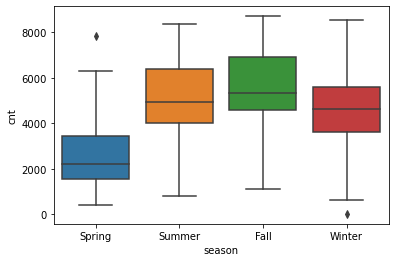

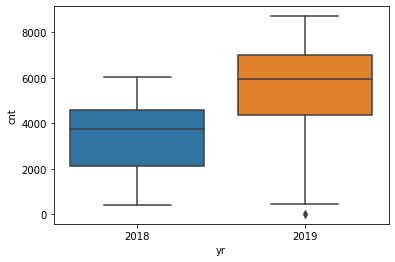

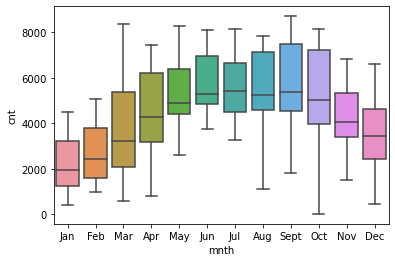

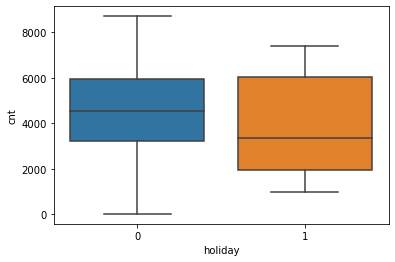

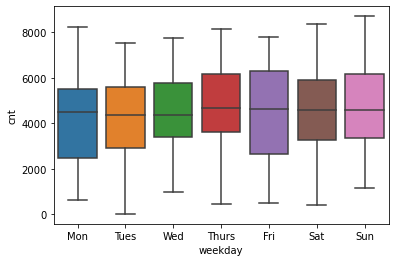

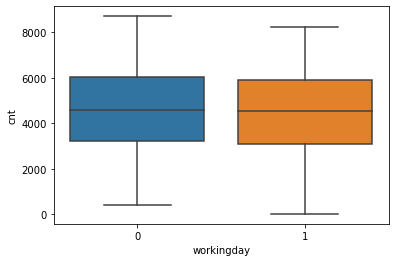

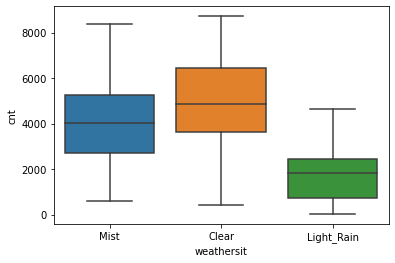

In [748]:
for i in range(len(cat_cols)):
    sns.boxplot(x=cat_cols[i], y="cnt", data=bike_data)
    plt.show()

- Season:
    - It is evident that in the Spring season the demand fell considerably while in Summer and Fall, the demands were high.
- Year:
    - This feature was the most impactful, as in 2019 the demands increased considerably than 2018. 
- Month
    - Overall the demand increased in the months June, July, August and September
- Week day and Working day
    - Negligible impact on the target variable
- Holiday
    - On holidays, the demand was a little less. Hence median is lower during holidays.
- Weather
    - Has a good impact on the target variable. Due to rainy conditions, the demand for shared bike fell considerably as people may have plausibly opted for more comfortable means of transport.


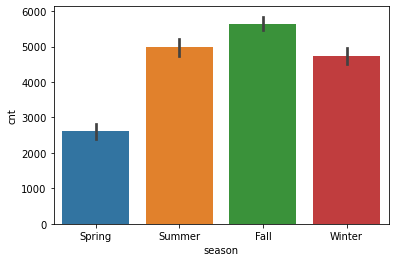

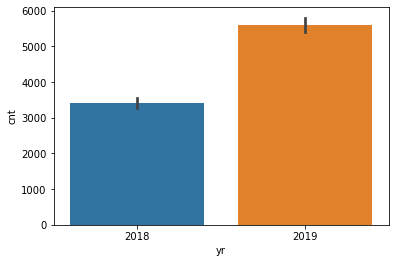

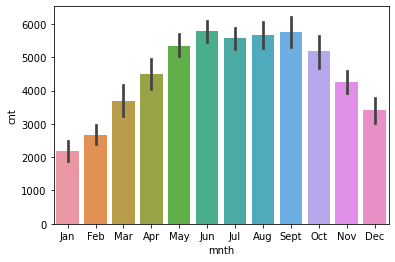

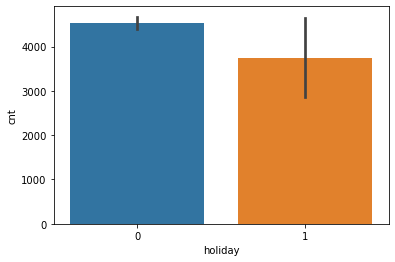

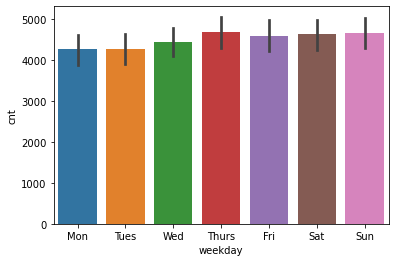

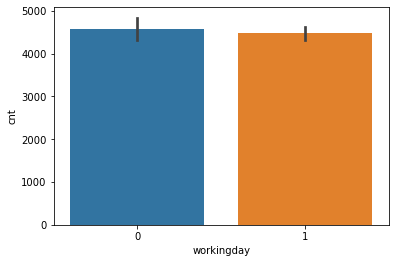

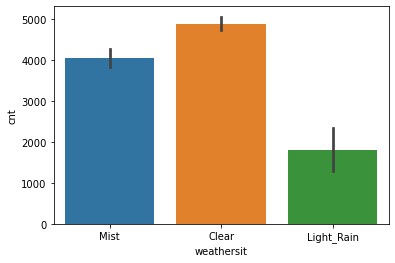

In [749]:
for i in list(cat_cols):
    sns.barplot(x=i, y="cnt", data=bike_data)
    plt.show()

- Season 
    - Fall season had higher demand than Summer
- Weather
    - Demands fell considerably during rainy conditions
- Year
    - 2019 had a higher demand than 2018

## Data visualization of numerical features

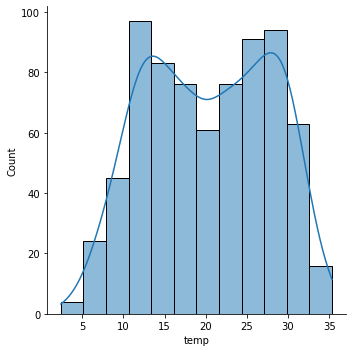

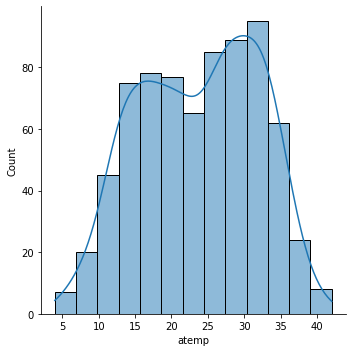

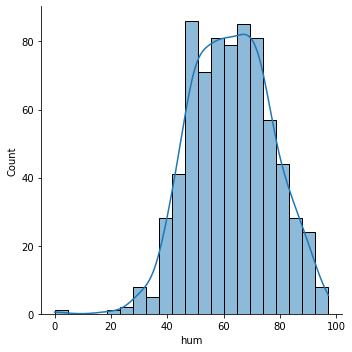

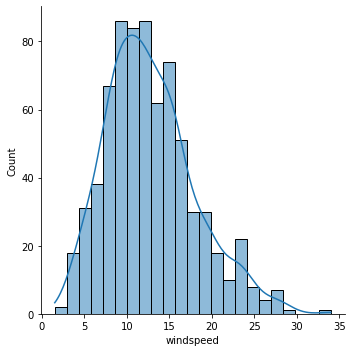

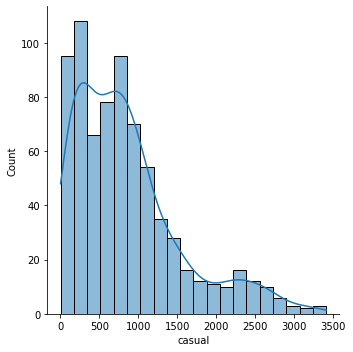

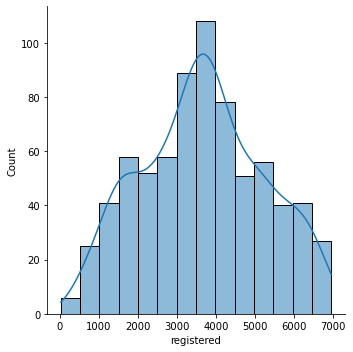

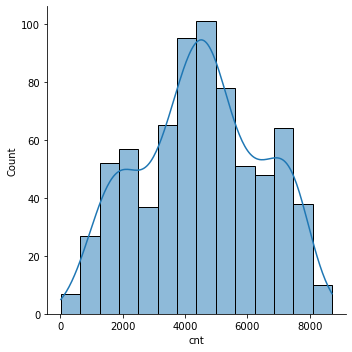

In [750]:
num_cols = list(bike_data.describe().columns)
for i in list(num_cols):
    sns.displot(x=bike_data[i],kde=True)
    plt.show()

The above numerical features follow aproximately a normal distribution.

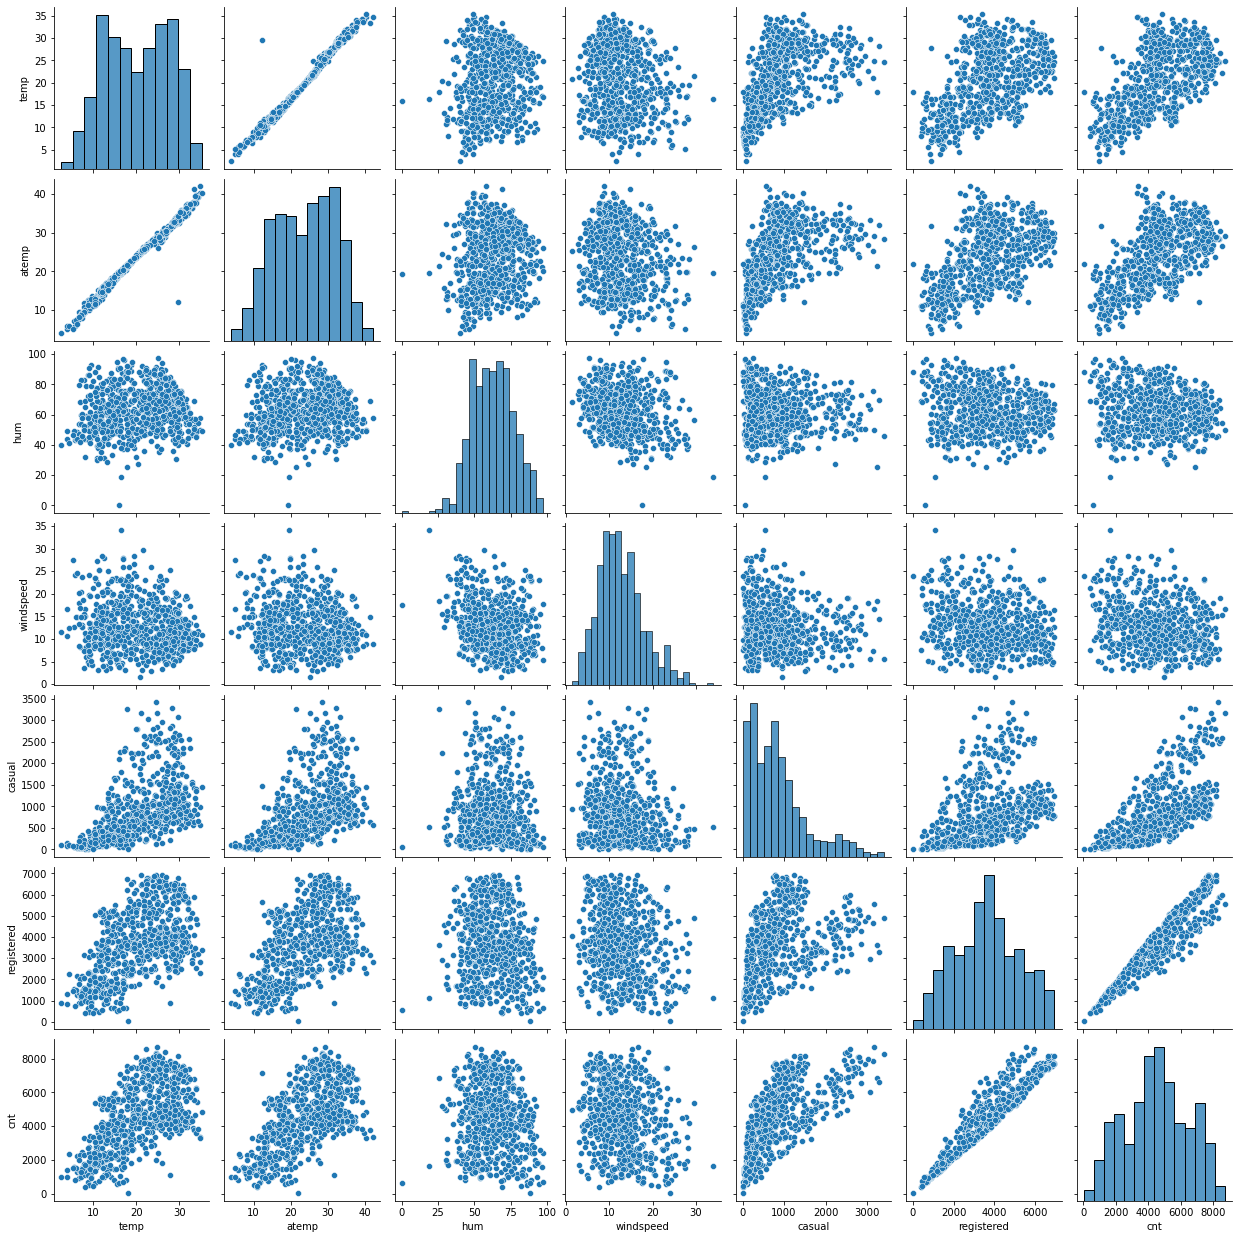

In [751]:
sns.pairplot(bike_data[num_cols])
plt.show()

- The registered and casual variables have the highest correlation with the target variable cnt for obvious reasons as cnt = registered + casual
- The next highly correlated variables with the target variable are temp and atemp
- The graphs are almost similar for temp and atemp

In [752]:
# Correlation matrix and Heatmap
cor = bike_data.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


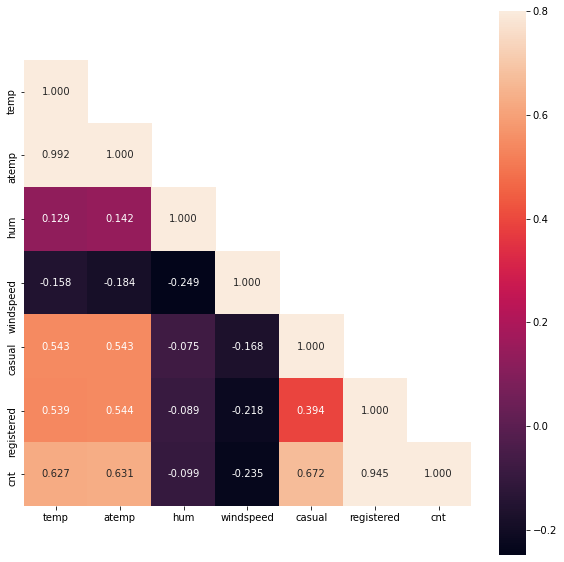

In [753]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=[10,10])
sns.heatmap(cor,annot=True,mask=mask,vmax=0.8,square=True,fmt=".3f")
plt.show()

The correlations are verified here as seen in the pairplots

# Handling Multicollinearity

Removing atemp which is highly correlated with temp to remove multicollinearity

In [754]:
bike_data.drop("atemp",axis=1,inplace=True)

# Data Preparation for ML model

In [755]:
# Removing casual and registered variables as we want only 1 target variable i.e. cnt and as cnt accomodates both casual and registered users
bike_data.drop(["casual","registered"],axis=1,inplace=True)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2018-01-01,Spring,2018,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,2018-02-01,Spring,2018,Jan,0,Tues,1,Mist,14.902598,69.6087,16.652113,801
2,2018-03-01,Spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,2018-04-01,Spring,2018,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,2018-05-01,Spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [756]:
# Removing dteday as it is date, not a feature.
bike_data.drop("dteday",axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tues,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [757]:
# Converting yr back to binary numerical feature
bike_data["yr"] = bike_data.yr.map({"2018":0,"2019":1})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [758]:
#Changing holiday and workingday back to binary numerical for ML model 
bike_data["holiday"] = bike_data.holiday.astype("int64")
bike_data["workingday"] = bike_data.workingday.astype("int64")
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [759]:
# Converting categorical variables to dummy variables
bike_categorical = bike_data[list(bike_data.select_dtypes(exclude=["float64","int64"]).columns)]
bike_dummy = pd.get_dummies(bike_categorical, drop_first=True)
bike_dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [760]:
bike_data = pd.concat([bike_data,bike_dummy],axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tues,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [761]:
#Dropping the original categorical features
bike_data.drop(["season","mnth","weekday","weathersit"],axis=1,inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dividing the dataset into training and testing

In [762]:
import sklearn
from sklearn.model_selection import train_test_split

In [763]:
bike_data_train, bike_data_test = train_test_split(bike_data, train_size = 0.8, test_size = 0.2, random_state = 100)

## Scaling

- Using MixMax scaling on some features as everything will be between 0 and 1 thus increasing the efficiency of the model
- Scaling target variable as well to have readable coefficients in the final model equation. We can choose not to scale the target variable but seeing the range of target variable we will have large coefficients in the final model equation making it a bit difficult to interpret.

In [764]:
from sklearn.preprocessing import MinMaxScaler

In [765]:
features_to_be_scaled = ["temp","hum","windspeed","cnt"]
scaler = MinMaxScaler()
bike_data_train[features_to_be_scaled] = scaler.fit_transform(bike_data_train[features_to_be_scaled])
bike_data_test[features_to_be_scaled] = scaler.transform(bike_data_test[features_to_be_scaled])

#### Dividing training and testing datasets into X and y datasets

In [766]:
X_train = bike_data_train.drop("cnt",axis=1)
y_train = bike_data_train.cnt

X_test = bike_data_test.drop("cnt",axis=1)
y_test = bike_data_test.cnt

In [767]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,0,0.326094,0.787463,0.189819,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
379,1,0,1,0.133996,0.431945,0.449210,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [768]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Building Linear Regression model using sklearn

In [769]:
from sklearn.linear_model import LinearRegression

In [770]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [771]:
coeff_df = pd.DataFrame(regressor.coef_,X_train.columns,columns=["Coefficient"])
coeff_df

,Coefficient
yr,0.228034
holiday,-0.132266
workingday,-0.048239
temp,0.445787
hum,-0.150467
windspeed,-0.177237
season_Spring,-0.056273
season_Summer,0.041766
season_Winter,0.110214
mnth_Aug,0.019379


In [772]:
regressor.intercept_

0.38273839534617055

In [773]:
#Predicting values
y_pred = regressor.predict(X_test)

In [774]:
#Comparing actual and predicted values
df_compare_pred = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df_compare_pred.head(10)

,Actual,Predicted
184,0.692706,0.405030
535,0.712034,0.898602
299,0.303382,0.446041
221,0.547400,0.620943
152,0.569029,0.612643
404,0.438104,0.448411
198,0.510354,0.504417
171,0.553728,0.465379
512,0.692706,0.709885
200,0.495858,0.558659


In [775]:
#Evaluating the model
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.07201152047885068
Mean Squared Error: 0.009052486882563184
Root Mean Squared Error: 0.09514455781894823


In [776]:
#Evaluating R2score and Adjusted_R2score for training dataset
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - float(SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train) - X_train.shape[1] - 1)
print(r_squared,adjusted_r_squared)

0.8547321208079326 0.8474032908667112


In [777]:
#Evaluating R2score and Adjusted_R2score for testing dataset
y_pred = regressor.predict(X_test)
SS_Residual = sum((y_test-y_pred)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - float(SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)
print(r_squared,adjusted_r_squared)

0.7986343880208161 0.7504443270343447


We need to reduce insignificant features using RFE. We will hence move onto model building with feature selection using RFE

# Model building using RFE

In [778]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [779]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [780]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

##### Model 1:- Out of 28 features we will choose top 20 features and evaluate the model

In [781]:
rfe1 = RFE(lm,20)
rfe1 = rfe1.fit(X_train,y_train)

In [782]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 8),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 9),
 ('weekday_Tues', False, 2),
 ('weekday_Wed', False, 4),
 ('weathersit_Light_Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [783]:
X_train_rfe1 = X_train[X_train.columns[rfe1.support_]]
X_train_rfe1.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weathersit_Light_Rain,weathersit_Mist
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,0,1,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,0,0,0,0,0,0,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,0,1,0,0,0,0,0,0,0,0,0
705,1,0,0,0.326094,0.787463,0.189819,0,0,1,1,0,0,0,0,0,0,1,0,0,1
379,1,0,1,0.133996,0.431945,0.449210,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [784]:
X_train_new1 = build_model(X_train_rfe1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.66e-219
Time:                        23:59:50   Log-Likelihood:                 601.43
No. Observations:                 584   AIC:                            -1161.
Df Residuals:                     563   BIC:                            -1069.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

##### Model 2:- Out of 28 features we will choose top 15 features and evaluate the model

In [785]:
rfe2 = RFE(lm,15)
rfe2 = rfe2.fit(X_train,y_train)

In [786]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thurs', False, 14),
 ('weekday_Tues', False, 7),
 ('weekday_Wed', False, 9),
 ('weathersit_Light_Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [787]:
X_train_rfe2 = X_train[X_train.columns[rfe2.support_]]
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_Light_Rain,weathersit_Mist
367,1,0,0.113228,0.454701,0.695175,1,0,0,0,1,0,0,0,0,0
648,1,0,0.468352,0.477458,0.299450,0,0,1,0,0,0,0,0,0,0
44,0,0,0.443431,0.387290,0.807474,1,0,0,0,0,0,0,0,0,0
705,1,0,0.326094,0.787463,0.189819,0,0,1,1,0,0,0,0,0,1
379,1,0,0.133996,0.431945,0.449210,1,0,0,0,1,0,0,0,0,0


In [788]:
X_train_new2 = build_model(X_train_rfe2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.71e-222
Time:                        23:59:50   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

Model 2 has eliminated all the insignificant features from Model 1. Model 2 is better.

##### Model 3:- Out of 28 features, we will choose 10 top features and evaluate the model

In [789]:
rfe3 = RFE(lm,10)
rfe3 = rfe3.fit(X_train,y_train)

In [790]:
list(zip(X_train.columns,rfe3.support_,rfe3.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 6),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 15),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 13),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 17),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thurs', False, 19),
 ('weekday_Tues', False, 12),
 ('weekday_Wed', False, 14),
 ('weathersit_Light_Rain', True, 1),
 ('weathersit_Mist', False, 2)]

In [791]:
X_train_rfe3 = X_train[X_train.columns[rfe3.support_]]
X_train_rfe3.head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Winter,mnth_Jul,mnth_Sept,weathersit_Light_Rain
367,1,0,0.113228,0.454701,0.695175,1,0,0,0,0
648,1,0,0.468352,0.477458,0.299450,0,1,0,0,0
44,0,0,0.443431,0.387290,0.807474,1,0,0,0,0
705,1,0,0.326094,0.787463,0.189819,0,1,0,0,0
379,1,0,0.133996,0.431945,0.449210,1,0,0,0,0


In [792]:
X_train_new3 = build_model(X_train_rfe3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     286.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.06e-215
Time:                        23:59:50   Log-Likelihood:                 565.04
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     573   BIC:                            -1060.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

Adjusted R2 score has decreased in Model 3 from Model 2. Model 2 is better.

## Building model 2 again and evaluating for VIF

In [793]:
X_train_new2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.71e-222
Time:                        23:59:50   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [794]:
checkVIF(X_train_rfe2)

,Features,VIF
3,hum,31.19
2,temp,18.15
4,windspeed,4.70
5,season_Spring,4.43
7,season_Winter,3.80
6,season_Summer,2.81
14,weathersit_Mist,2.34
0,yr,2.11
11,mnth_Nov,1.74
9,mnth_Jan,1.71


hum has a very high VIF. Will remove and check VIF again

In [795]:
X_train_rfe2.drop("hum",axis=1,inplace=True)

In [796]:
X_train_new2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.39e-219
Time:                        23:59:50   Log-Likelihood:                 584.55
No. Observations:                 584   AIC:                            -1139.
Df Residuals:                     569   BIC:                            -1074.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [797]:
checkVIF(X_train_rfe2)

,Features,VIF
2,temp,5.34
3,windspeed,4.65
4,season_Spring,2.87
6,season_Winter,2.78
5,season_Summer,2.28
0,yr,2.08
10,mnth_Nov,1.69
8,mnth_Jan,1.62
9,mnth_Jul,1.61
13,weathersit_Mist,1.56


temp has a high VIF. Will remove and check VIF again

In [798]:
X_train_rfe2.drop("temp",axis=1,inplace=True)

In [799]:
X_train_new2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.20e-187
Time:                        23:59:50   Log-Likelihood:                 506.40
No. Observations:                 584   AIC:                            -984.8
Df Residuals:                     570   BIC:                            -923.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.59

In [800]:
# Removing season_Winter 
X_train_rfe2.drop("season_Winter",axis=1,inplace=True)

In [801]:
X_train_new2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.59e-188
Time:                        23:59:50   Log-Likelihood:                 506.19
No. Observations:                 584   AIC:                            -986.4
Df Residuals:                     571   BIC:                            -929.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.59

In [802]:
# Removing mnth_Jul
X_train_rfe2.drop("mnth_Jul",axis=1,inplace=True)

In [803]:
X_train_new2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train,X_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.87e-189
Time:                        23:59:50   Log-Likelihood:                 505.98
No. Observations:                 584   AIC:                            -988.0
Df Residuals:                     572   BIC:                            -935.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.58

In [804]:
checkVIF(X_train_rfe2)

,Features,VIF
2,windspeed,3.14
3,season_Spring,2.33
0,yr,1.78
4,season_Summer,1.69
6,mnth_Jan,1.58
10,weathersit_Mist,1.47
7,mnth_Nov,1.20
8,mnth_Sept,1.16
5,mnth_Dec,1.15
1,holiday,1.06


# Residual Analysis of train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [805]:
#Predicting values for training data
y_train_pred = lm.predict(X_train_new2)

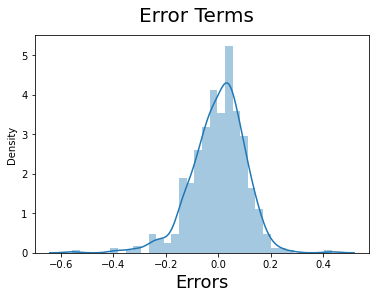

In [806]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

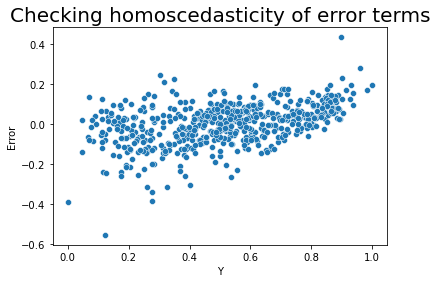

In [807]:
sns.scatterplot(x=y_train, y= (y_train-y_train_pred))
plt.xlabel("Y")
plt.ylabel("Error")
plt.title("Checking homoscedasticity of error terms", fontsize=20)
plt.show()

# Making predictions

In [808]:
X_test = sm.add_constant(X_test)
X_test_new2 = X_test[X_train_new2.columns]
X_test_new2.head()

,const,yr,holiday,windspeed,season_Spring,season_Summer,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Sept,weathersit_Light_Rain,weathersit_Mist
184,1.0,0,1,0.084219,0,0,0,0,0,0,0,1
535,1.0,1,0,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0,0.334206,0,0,0,0,0,0,0,1
221,1.0,0,0,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0,0.537414,0,1,0,0,0,0,0,0


In [809]:
#Making predictions
y_pred = lm.predict(X_test_new2)

# Model Evaluation

In [810]:
#Evaluating R2score and Adjusted_R2score for testing dataset
SS_Residual = sum((y_test-y_pred)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - float(SS_Residual)/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test) - X_test_new2.shape[1] - 1)
print(r_squared,adjusted_r_squared)

0.7588007781868984 0.7370384423842125


Text(0, 0.5, 'y_pred')

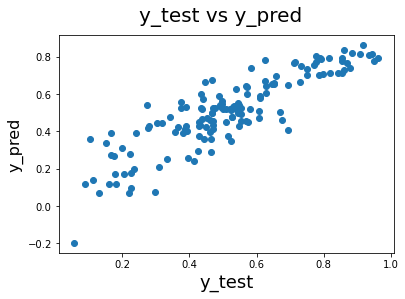

In [811]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [812]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7588007781868984

# Final Model

We can see that the equation of our best fitted line is:
$ cnt = 0.5899 + 0.2424  \times  yr - 0.0836  \times  holiday - 0.1824 \times windspeed - 0.2527 \times season\_Spring - 0.0381 \times season\_Summer  - 0.119 \times mnth\_Jan  - 0.1253 \times mnth\_Nov + 0.0533 \times mnth\_Sept - 0.1229 \times mnth\_Dec - 0.3175 \times weathersit\_Light\_Rain - 0.0858 \times weathersit\_Mist $